In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load dataset
df = pd.read_csv("athlete_events.csv")


In [ ]:
df.describe()

,ID,Age,Height,Weight,Year
count,89283.000000,85938.000000,68625.000000,67567.000000,89283.000000
mean,22910.426498,25.625672,175.559301,70.935412,1977.741832
std,12979.158701,6.453792,10.392730,14.169830,30.118858
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,11749.000000,21.000000,168.000000,61.000000,1960.000000
50%,23002.000000,25.000000,175.000000,70.000000,1984.000000
75%,34252.500000,28.000000,183.000000,79.000000,2002.000000
max,45248.000000,88.000000,223.000000,214.000000,2016.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89283 entries, 0 to 89282
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      89283 non-null  int64  
 1   Name    89283 non-null  object 
 2   Sex     89283 non-null  object 
 3   Age     85938 non-null  float64
 4   Height  68625 non-null  float64
 5   Weight  67567 non-null  float64
 6   Team    89283 non-null  object 
 7   NOC     89283 non-null  object 
 8   Games   89283 non-null  object 
 9   Year    89283 non-null  int64  
 10  Season  89283 non-null  object 
 11  City    89283 non-null  object 
 12  Sport   89283 non-null  object 
 13  Event   89283 non-null  object 
 14  Medal   12600 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 10.2+ MB


In [ ]:
# Filter for rows with medals only
medals_df = df.dropna(subset=["Medal"])
medals_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89264,45242,Charles Hamelin,M,21.0,175.0,71.0,Canada,CAN,2006 Winter,2006,Winter,Torino,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Silver
89265,45242,Charles Hamelin,M,25.0,175.0,71.0,Canada,CAN,2010 Winter,2010,Winter,Vancouver,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Gold
89268,45242,Charles Hamelin,M,25.0,175.0,71.0,Canada,CAN,2010 Winter,2010,Winter,Vancouver,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Gold
89271,45242,Charles Hamelin,M,29.0,175.0,71.0,Canada,CAN,2014 Winter,2014,Winter,Sochi,Short Track Speed Skating,"Short Track Speed Skating Men's 1,500 metres",Gold


In [ ]:
# Group by Year and NOC (country code), count medal types
medal_counts = medals_df.groupby(["NOC", "Year", "Medal"]).size().unstack(fill_value=0)
medal_counts

Medal     Bronze  Gold  Silver
NOC Year                      
AHO 1988       0     0       1
ALG 1992       0     1       0
    1996       1     0       0
    2000       1     0       0
    2008       1     0       1
...          ...   ...     ...
YUG 1984      10    14       1
    1988       3     5       9
ZIM 1980       0     7       0
    2004       1     1       1
    2008       0     1       3

[1126 rows x 3 columns]

In [ ]:

# Add total medals column
medal_counts["Total"] = medal_counts.sum(axis=1)
medal_counts = medal_counts.reset_index()
medal_counts


Medal,NOC,Year,Bronze,Gold,Silver,Total
0,AHO,1988,0,0,1,1
1,ALG,1992,0,1,0,1
2,ALG,1996,1,0,0,1
3,ALG,2000,1,0,0,1
4,ALG,2008,1,0,1,2
...,...,...,...,...,...,...
1121,YUG,1984,10,14,1,25
1122,YUG,1988,3,5,9,17
1123,ZIM,1980,0,7,0,7
1124,ZIM,2004,1,1,1,3


In [ ]:
# Optional: Filter for a single country, e.g., India
india_medals = medal_counts[medal_counts["NOC"] == "IND"].sort_values("Year")
india_medals


Medal,NOC,Year,Bronze,Gold,Silver,Total
504,IND,1928,0,5,0,5
505,IND,1932,0,6,0,6
506,IND,1936,0,7,0,7
507,IND,1948,0,6,0,6
508,IND,1952,0,5,0,5
509,IND,1956,0,2,0,2
510,IND,1960,0,0,2,2
511,IND,1964,0,1,0,1
512,IND,1968,1,0,0,1
513,IND,1972,3,0,0,3


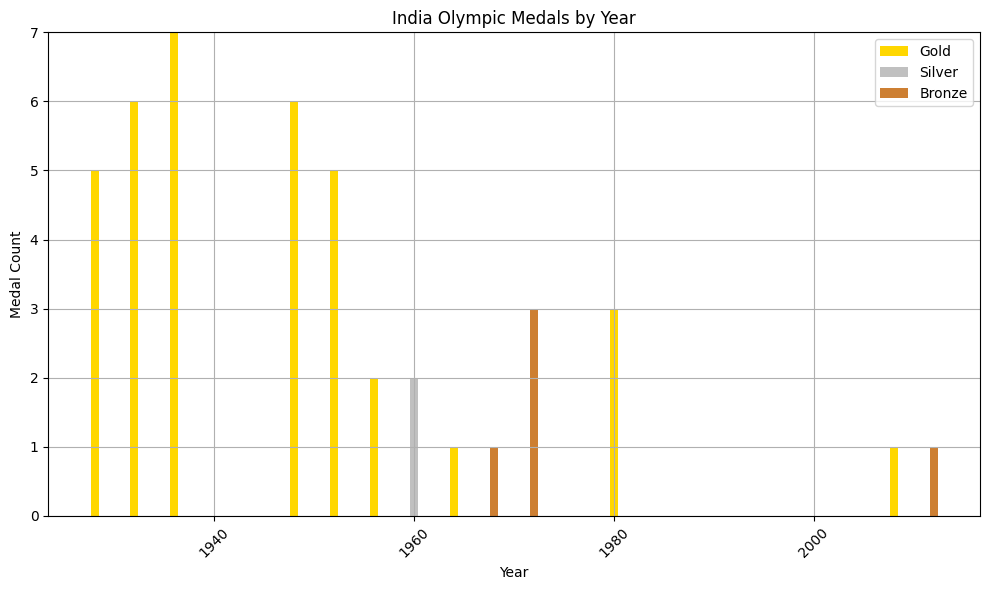

In [ ]:
# Plot stacked bar chart for India
plt.figure(figsize=(10, 6))
plt.bar(india_medals["Year"], india_medals["Gold"], label="Gold", color="gold")
plt.bar(india_medals["Year"], india_medals["Silver"], bottom=india_medals["Gold"], label="Silver", color="silver")
plt.bar(india_medals["Year"], india_medals["Bronze"], bottom=india_medals["Gold"] + india_medals["Silver"], label="Bronze", color="#cd7f32")
plt.title("India Olympic Medals by Year")
plt.xlabel("Year")
plt.ylabel("Medal Count")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()